In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from PIL import Image, ImageOps

In [2]:
with open('bsc-3m/traj_01_elab.pkl', 'rb') as f:
    df = pickle.load(f)
df = df.loc[df['class'] == 'Car']

In [3]:
x = df[['x0', 'y0', 'x1', 'y1']].to_numpy()

In [15]:
K = KMeans(n_clusters=10, random_state=69)
xc = np.concatenate((x, K.fit_predict(x).reshape(-1,1)),axis=1)

In [13]:
col = sns.color_palette()

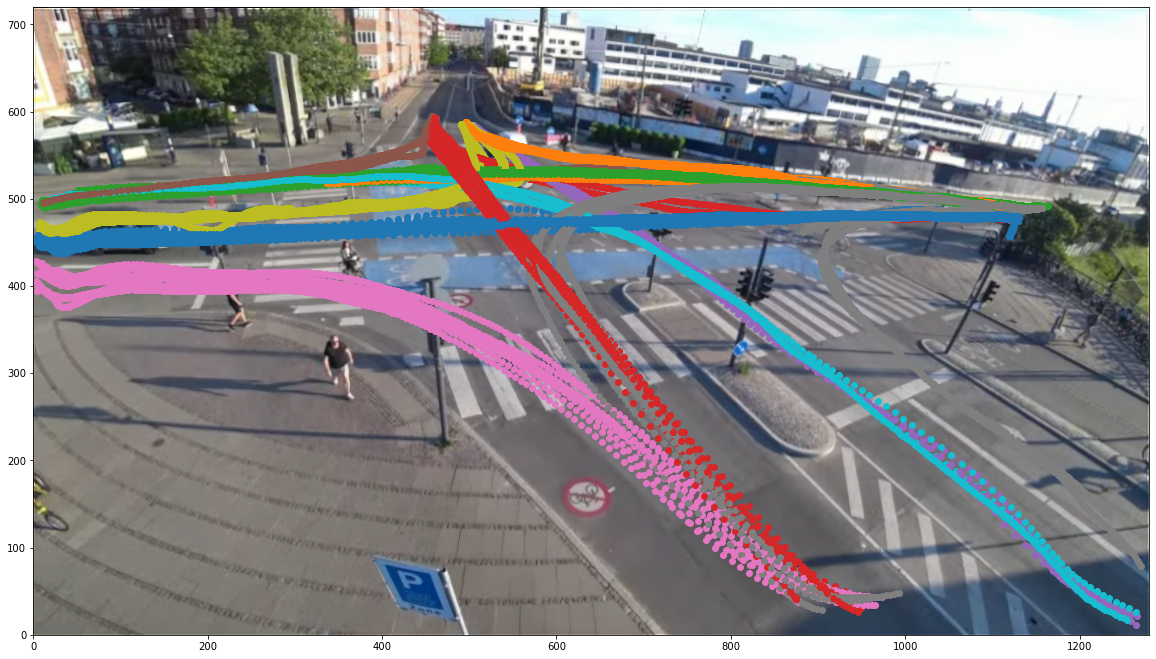

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
im = Image.open("intersection2.png")
im = ImageOps.flip(im)
ax.set_xlim(0,1280)
ax.set_ylim(0,720)
ax.imshow(im, origin='lower')
for i, (_, row) in enumerate(df.iterrows()):
    ax.scatter(row['xs'], row['ys'], color=col[int(xc[i,-1])])# [xc[i,-1]]*len(row['xs']))
    if i == 100:
        break
plt.show()